# Yandex.Afisha Marketing Expense Analysis <a id='back'></a>

## Table of Contents

- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Step 1: Importing Libraries and Opening Data Files](#step-1-importing-libraries-and-opening-data-files)
- [Step 2: Pre-processing the Data](#step-2-pre-processing-the-data)
    - [Pre-Processing visits_log_us](#pre-processing-visits_log_us)
    - [Pre-Processing orders_log_us](#pre-processing-orders_log_us)
    - [Pre-Processing costs](#pre-processing-costs)
- [Step 3: Data analysis](#step-3-data-analysis)
    - [Products](#products)
        - [Calculating daily sessions per user](#calculating-daily-sessions-per-user)
        - [Average session length](#average-session-length)
        - [Retention Rate](#retention-rate)
    - [Sales](#sales)
        - [Customer purchase timeframe](#customer-purchase-timeframe)
        - [Cohort Monthly Order Volume](#cohort-monthly-order-volume)
        - [Average purchase size](#average-purchase-size)
        - [Customer long term value](#customer-long-term-value)
    - [Marketing](#marketing)
        - [Total marketing cost](#total-marketing-cost)
        - [Marketings cost per source](#marketings-cost-per-source)
        - [Marketing cost per source over time](#marketing-cost-per-source-over-time)
        - [Customer acquisition cost per source](#customer-acquisition-cost-per-source)
        - [Return on marketing investment](#return-on-marketing-investment)
    
- [Conclusion](#conclusion)

## Project Introduction

As a new intern at Yandex.Afisha analytics department, I will be overlooking the marketing expenses to see if there is room for optimization.

## Analysis Outline

Products 

•	Grouped users by various timeframes (daily, weekly, monthly) to find the total number of users for that period.

•	Calculate the session frequency of daily users.

•	Calculate the length of each user session. 

•	Create monthly cohorts and calculate the user retention rate for every cohort. 

Sales 

•	Analyze the conversion timeframe from a customer’s first visit and their first purchase.

•	Calculate the total number of orders made each month for each monthly cohort.

•	Calculate the average purchase size for each monthly cohort.

•	Calculate the long-term value of each monthly cohort.

Marketing 

•	Calculate the overall, per source, and overtime of marketing cost spent.

•	Calculate customer acquisition cost from each of the sources.

•	Calculate the return on marketing investment on each monthly cohort.


## Results 

Based on the sample data, the ideal solution would be to allocate more of the marketing budget to the sources that were used to acquire the summer 17' cohorts and the September 17' cohort since those cohorts had the highest long term return on marketing investment.

[Back to Table of Contents](#back)

## Step 1: Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing file for assignment
try:
    visits_log_us = pd.read_csv('visits_log_us.csv',
                                sep=',')
except:
    visits_log_us = pd.read_csv('/datasets/visits_log_us.csv',
                                sep=',')
    
try:
    orders_log_us = pd.read_csv('orders_log_us.csv',
                                sep=',')
except:
    orders_log_us = pd.read_csv('/datasets/orders_log_us.csv',
                                sep=',')

try:
    costs = pd.read_csv('costs_us.csv',
                        sep=',')
except:
    costs = pd.read_csv('/datasets/costs_us.csv',
                        sep=',')

[Back to Table of Contents](#back)

## Step 2: Pre-processing the Data

### Pre-Processing visits_log_us

In [3]:
# Checking for duplicates, null values, and data types
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#checking for snakecase format
visits_log_us.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [5]:
# Renaming column names to snake_case format
visits_log_us = visits_log_us.rename(columns={'Device':'device',
                                              'End Ts':'end_ts',
                                              'Source Id':'source_id',
                                              'Start Ts':'start_ts',
                                              'Uid':'uid'})
visits_log_us.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [6]:
# Checking for duplicates
visits_log_us.duplicated().sum()

0

In [7]:
# Checking for null values
visits_log_us.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [8]:
# Checking for unique values in the 'device' column to see if we can change the data type to condense data usage
visits_log_us['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [9]:
# Converting data type to lower data usage
visits_log_us['device'] = visits_log_us['device'].astype('category')

In [10]:
# Converting data type to datetime
visits_log_us['start_ts'] = pd.to_datetime(visits_log_us['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log_us['end_ts'] = pd.to_datetime(visits_log_us['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# Checking for unique value count
visits_log_us['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [12]:
# Checking for duplicates
visits_log_us['uid'].nunique()

228169

In [13]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


[Back to Table of Contents](#back)

### Pre-Processing orders_log_us

In [14]:
# Checking for duplicates, null values, and data types
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
# Checking for snakecase format
orders_log_us.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [16]:
# Renaming column names to snake_case format
orders_log_us = orders_log_us.rename(columns={'Buy Ts':'buy_ts',
                                              'Revenue':'revenue',
                                              'Uid':'uid'})
orders_log_us.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [17]:
# Checking for duplicates
orders_log_us.duplicated().sum()

0

In [18]:
# Checking for null values
orders_log_us.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [19]:
# Converting data type to datetime
orders_log_us['buy_ts'] = pd.to_datetime(orders_log_us['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [20]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


[Back to Table of Contents](#back)

### Pre-Processing costs

In [21]:
# Checking for duplicates, null values, and data types
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
# Checking for snakecase format
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [23]:
# Converting data type to datetime
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [24]:
# Checking for duplicates
costs.duplicated().sum()

0

In [25]:
# Checking for null values
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


[Back to Table of Contents](#back)

## Step 3: Data analysis

### Products

##### Calulating daily, weekly, and monthly users

In [27]:
# Getting the date, week, month, and yearly values from the date column for later analysis
visits_log_us['visit_date'] = visits_log_us['start_ts'].dt.date
visits_log_us['visit_week'] = visits_log_us['start_ts'].dt.isocalendar().week
visits_log_us['visit_month'] = visits_log_us['start_ts'].dt.month
visits_log_us['visit_year'] = visits_log_us['start_ts'].dt.year

In [28]:
# Counting the average unique daily active users
dau_total = visits_log_us.groupby('visit_date').agg({'uid':'nunique'}).mean()

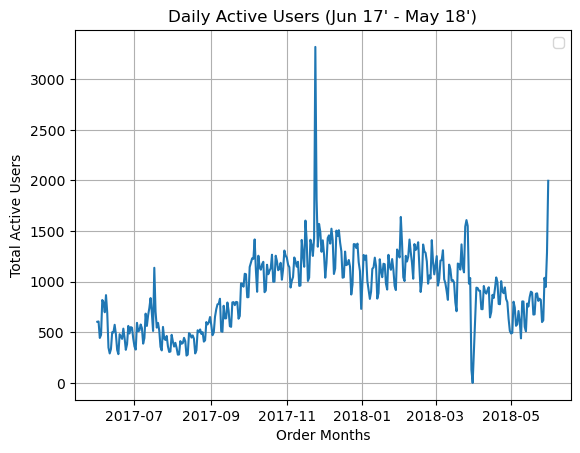

In [29]:
# Plotting the number of unique daily active users
dau_total_graph = visits_log_us.groupby('visit_date').agg({'uid':'nunique'})

dau_total_graph.plot(kind='line',
                     title='Daily Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.legend('')
plt.grid()
plt.show()

From the daily active users it shows three different spikes in the dataset which we should look into to see what event could have caused this annomaly

In [30]:
# Counting the average unique weekly active users
wau_total = visits_log_us.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()

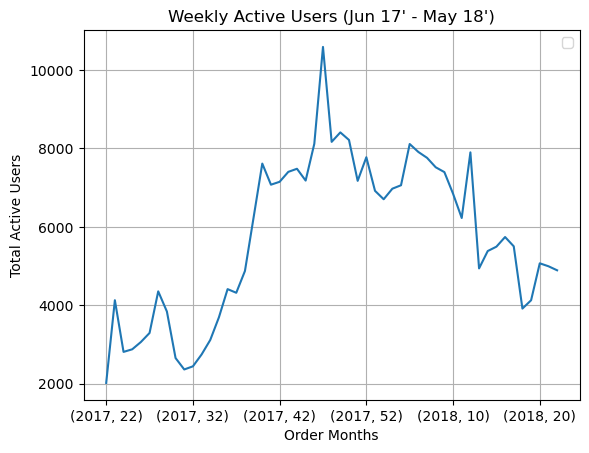

In [31]:
# Plotting the number of unique weekly active users
wau_total_graph = visits_log_us.groupby(['visit_year','visit_week']).agg({'uid':'nunique'})

wau_total_graph.plot(kind='line',
                     title='Weekly Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.legend('')
plt.grid()
plt.show()

Based on the weekly data it shows that in Q4 there is a naturally large spike in active users most likely due to seasonality

In [32]:
# Counting the average unique monthly active users
mau_total = visits_log_us.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()

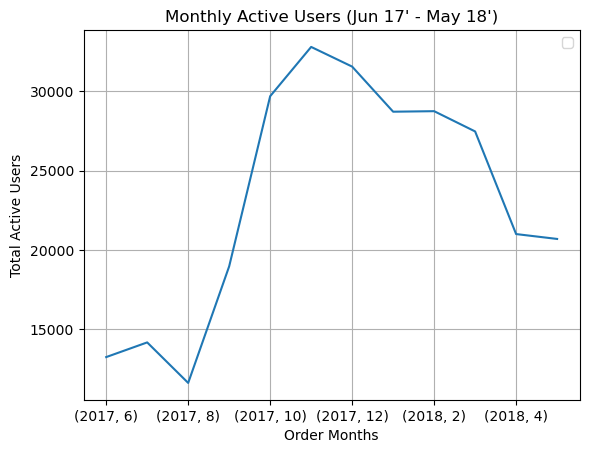

In [33]:
# Plotting the number of unique monthly active users
mau_total_graph = visits_log_us.groupby(['visit_year','visit_month']).agg({'uid':'nunique'})

mau_total_graph.plot(kind='line',
                     title='Monthly Active Users (Jun 17\' - May 18\')',
                     xlabel='Order Months',
                     ylabel='Total Active Users')
plt.legend('')
plt.grid()
plt.show()

From the monthly graph it shows a long 6+ month decline in monthly active users showing that users will check in most weeks but not every week leading to lower monthly user activity

In [34]:
print('Average daily active users:', dau_total.round())
print('Average weekly active users:', wau_total.round())
print('Average monthly active users:', mau_total.round())

Average daily active users: uid    908.0
dtype: float64
Average weekly active users: uid    5716.0
dtype: float64
Average monthly active users: uid    23228.0
dtype: float64


We can see that there are about 908 daily users, 5716 weekly users, and 23,228 monthly users

[Back to Table of Contents](#back)

##### Calculating daily sessions per user

In [35]:
# Counting the total number of unique active users and the total number of sessions opened
sess_per_user = visits_log_us.groupby('visit_date').agg({'uid':['count','nunique']})

# Naming the columns in the new dataframe
sess_per_user.columns = ['n_sessions','n_users']

# Calculating the average number of users per session
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']
print('Average sessions per daily user:',sess_per_user['sess_per_user'].mean())
print('Average sessions per daily user:',sess_per_user['sess_per_user'].median())

Average sessions per daily user: 1.082169644003972
Average sessions per daily user: 1.0824875552419868


This data shows that the median and average daily users mostly visit once a day with a few coming back multiple times. Since the average and median values are similar in length it also shows that there are not many significant outliers to skew the results.

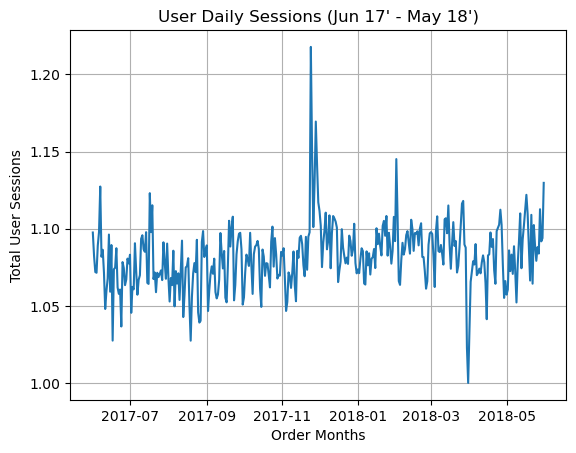

In [36]:
# Plotting the average daily sessions per user
sess_per_user['sess_per_user'].plot(kind='line',
                                    title='User Daily Sessions (Jun 17\' - May 18\')',
                                    xlabel='Order Months',
                                    ylabel='Total User Sessions')
plt.grid()
plt.show()

Similar to the daily active users graph, this graph shows a few spikes in the data in which we need to look into to see what events could have possible occured for this to happen

[Back to Table of Contents](#back)

##### Average session length

In [37]:
# Calculating the average session length
visits_log_us['visit_duration'] = (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.seconds.mean()
print('Average Session Length (in seconds):', visits_log_us['visit_duration'].round().mean())

Average Session Length (in seconds): 644.0


The average session length per user is about 644 seconds or about 10 minutes and 40 seconds

[Back to Table of Contents](#back)

##### Retention Rate

In [38]:
# Creating a new time frame for later analysis
visits_log_us['month_year'] = visits_log_us['start_ts'].values.astype('datetime64[M]')

In [39]:
# Creating a new dataframe for cohort analysis
first_activity_month_year = visits_log_us.groupby('uid')['month_year'].min()

# Naming the new column
first_activity_month_year.name = 'first_activity_month_year'

# Joining the new dataframe
visits_log_us = visits_log_us.join(first_activity_month_year, on='uid')

In [40]:
# Calculating cohort lifetime
visits_log_us['cohort_lifetime'] = visits_log_us['month_year'] - visits_log_us['first_activity_month_year']

# Dividing the new cohort lifetime column into months
visits_log_us['cohort_lifetime'] = visits_log_us['cohort_lifetime'] / np.timedelta64(1,'M')

# Converting cohort lifetime to an integer data type
visits_log_us['cohort_lifetime'] = visits_log_us['cohort_lifetime'].round().astype('int')

In [41]:
# Grouping the data by cohort lifetimes to get the number of active users in each cohort
cohorts = (visits_log_us.groupby(['first_activity_month_year','cohort_lifetime']).agg({'uid':'nunique'}).reset_index())

In [42]:
#Filtering cohorts by cohort lifetime value and finding the total number of users in the cohort by looking at week 0
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month_year','uid']]

# Renaming columns
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# Merging the columns
cohorts = cohorts.merge(initial_users_count, on='first_activity_month_year')

# Calculating for the retention rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

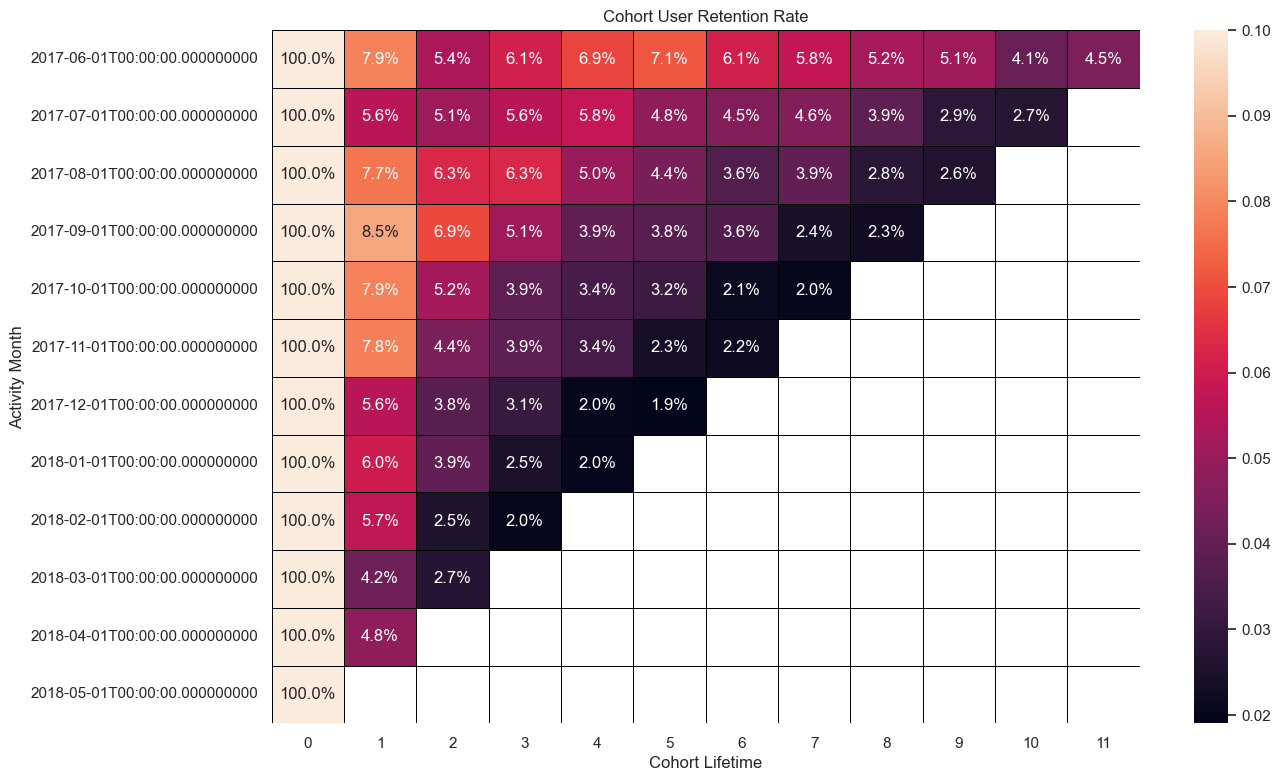

In [43]:
# Plotting the retention rate
retention_pivot = cohorts.pivot_table(index='first_activity_month_year',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(14, 9))
sns.heatmap(retention_pivot,
            annot=True,
            fmt='.1%',
            linewidths=0.5,
            linecolor='black',
            vmax=.1)

plt.title('Cohort User Retention Rate')
plt.xlabel('Cohort Lifetime')
plt.ylabel('Activity Month')
plt.show()

Based on this heat map it shows that the user retention rate is high during the summer and all cohort renention rates stay elevated into the winter holiday season. When Q1 starts is when most of the older cohort retention rates start to dwindle down as that is the start of the slow season.

[Back to Table of Contents](#back)

### Sales

##### Customer purchase timeframe

In [44]:
# To find the difference in purchase time frame we first visit time we must first find the earliest order time for 
# users. For all analyses involving customer purchases I will be creating a new dataframe for these analyses called 
# "buyers". I am adding source_id to the buyers dataframe for future use and lower future memore usage.

buyers = orders_log_us
buyers['source_id'] = visits_log_us['source_id']

In [45]:
# Creating the first order date dataframe
first_order_date = orders_log_us.groupby('uid').agg({'buy_ts':'min'}).reset_index()

# Naming the columns
first_order_date.columns = ['uid', 'first_order_date']

# Merging the dataframe
buyers = buyers.merge(first_order_date, on='uid')

In [46]:
# Uncovering the each users first time date 
first_visit_date = visits_log_us.groupby('uid').agg({'start_ts':'min'}).reset_index()

# Naming the columns
first_visit_date.columns = ['uid', 'first_visit_date']

# Merging the dataframe
buyers = buyers.merge(first_visit_date, on='uid')

In [47]:
# Calculating the difference between time of purchase and first time visit
buyers['order_diff'] = buyers['first_order_date'] - buyers['first_visit_date']

# Conveting values into days
buyers['order_diff'] = buyers['order_diff'] / np.timedelta64(1,'D')

# Calculating the mean number of days
buyers['order_diff'].mean()

17.61735459574421

The average time between users visiting the site and ordering is about 17 days

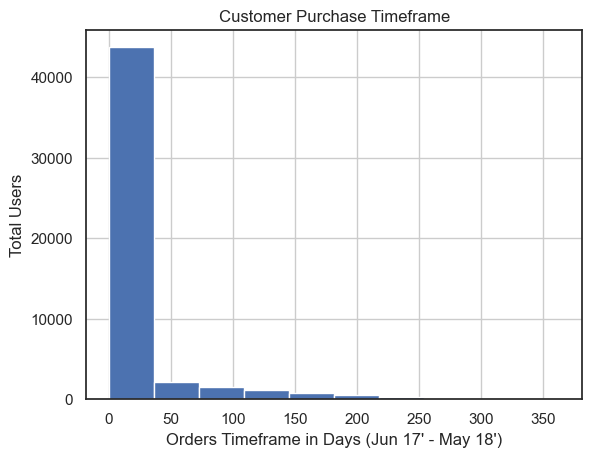

In [48]:
# Plotting the histogram 
buyers['order_diff'].hist()

plt.title('Customer Purchase Timeframe')
plt.xlabel('Orders Timeframe in Days (Jun 17\' - May 18\')')
plt.ylabel('Total Users')
plt.show()

From the histogram it shows that most users who did make a purchase made the purchase within 50 days of visiting the site

[Back to Table of Contents](#back)

##### Cohort Monthly Order Volume

In [49]:
# Converting the purchase times into datetime months and first order dates into datetime months
buyers['order_month'] = buyers['buy_ts'].values.astype('datetime64[M]')
buyers['first_order_month'] = buyers['first_order_date'].values.astype('datetime64[M]')

In [50]:
# Looking for outliers
buyers['first_order_month'].tail()

50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
50414   2018-06-01
Name: first_order_month, dtype: datetime64[ns]

In [51]:
# Removing outlier
buyers = buyers.drop(50414)
buyers['first_order_month'].tail()

50409   2018-05-01
50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-05-01
Name: first_order_month, dtype: datetime64[ns]

In [52]:
# Calculating each cohort age
buyers['cohort_age'] = buyers['order_month'] - buyers['first_order_month']

# Conveting values into months
buyers['cohort_age'] = buyers['cohort_age'] / np.timedelta64(1,'M')

# Converting cohort lifetime to an integer data type
buyers['cohort_age'] = buyers['cohort_age'].round().astype(int)
buyers['cohort_age']

0        0
1        0
2        0
3        0
4        0
        ..
50409    0
50410    0
50411    0
50412    0
50413    0
Name: cohort_age, Length: 50414, dtype: int32

In [53]:
# Grouping orders by first order month and order month and counting all orders made in that time frame and storing it in a new dataframe
total_monthly_orders = buyers.groupby(['first_order_month','order_month']).agg({'revenue':'count'}).reset_index()

# Naming the new columns
total_monthly_orders.columns = ['first_order_month','order_month','total_monthly_orders']

# Merging the new dataframe with the buyers dataframe
buyers = pd.merge(buyers, total_monthly_orders, how='inner', left_on=['first_order_month','order_month'], right_on=['first_order_month','order_month'])

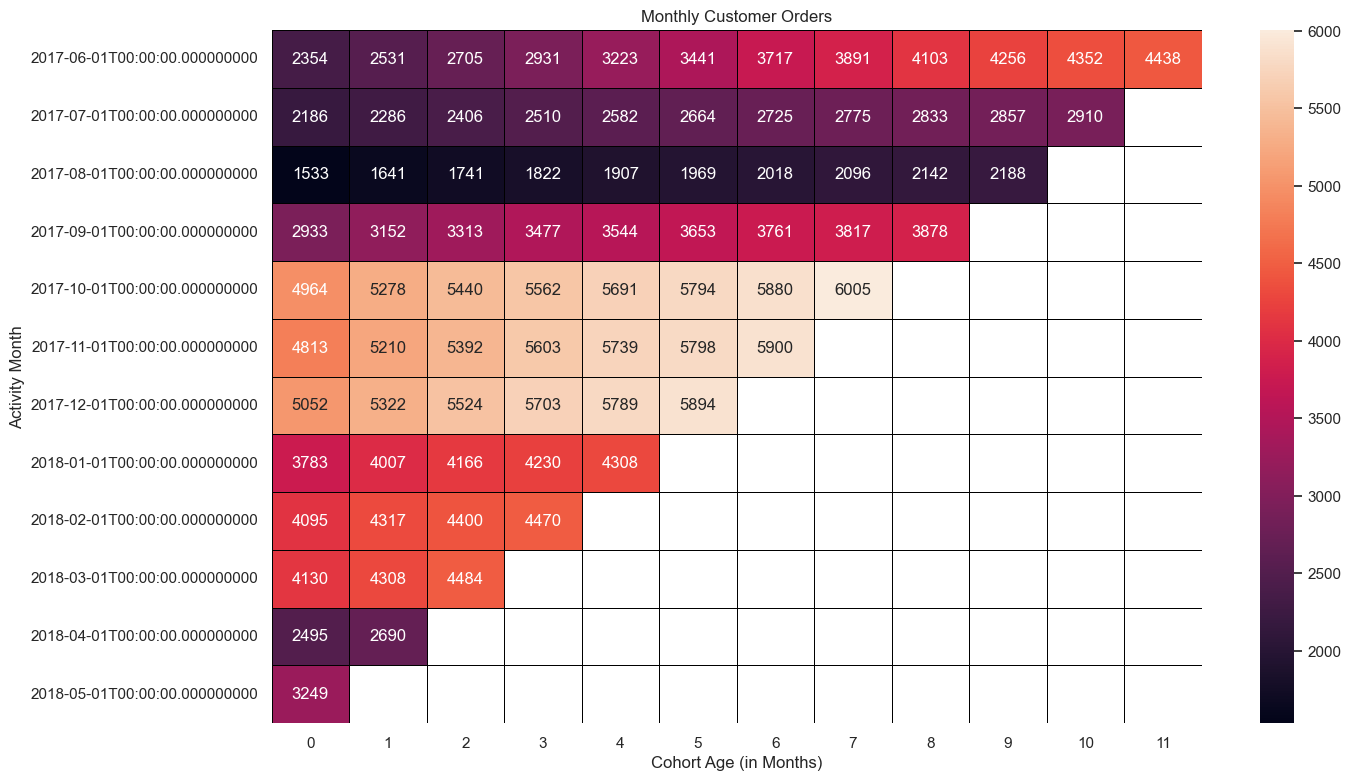

In [54]:
# Plotting for total monthly orders from various cohorts
monthly_orders = buyers.pivot_table(index='first_order_month',
                                    columns='cohort_age',
                                    values='total_monthly_orders',
                                    aggfunc='count').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(monthly_orders,
            annot=True,
            fmt='g',
            linewidths=0.5,
            linecolor='black')

plt.title('Monthly Customer Orders')
plt.xlabel('Cohort Age (in Months)')
plt.ylabel('Activity Month')
plt.show()

Based on the pivot table, it shows that cohorts that started ordering from us during the 2017 holiday season tend to keep coming back and ordering more in the following months. It should be noted that cohorts who started purchasing from us from July and August 2017 tend to not order as much as the other cohorts even during the holiday season. Cohorts from these two months should be examined from where they came from and should be targeted less and the ones during the holiday season should be increased.

[Back to Table of Contents](#back)

##### Average purchase size

In [55]:
# Creating a new dataframe with total users
cohort_size = buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

# Naming the columns in the new dataframe
cohort_size.columns = ['first_order_month','cohort_size']

# Merging the new dataframe with the buyers dataframe
buyers = buyers.merge(cohort_size, on='first_order_month')

In [56]:
# Calculating the average number of orders by dividing the number of orders by the cohort size
buyers['avg_monthly_orders'] = buyers['total_monthly_orders'] / buyers['cohort_size']

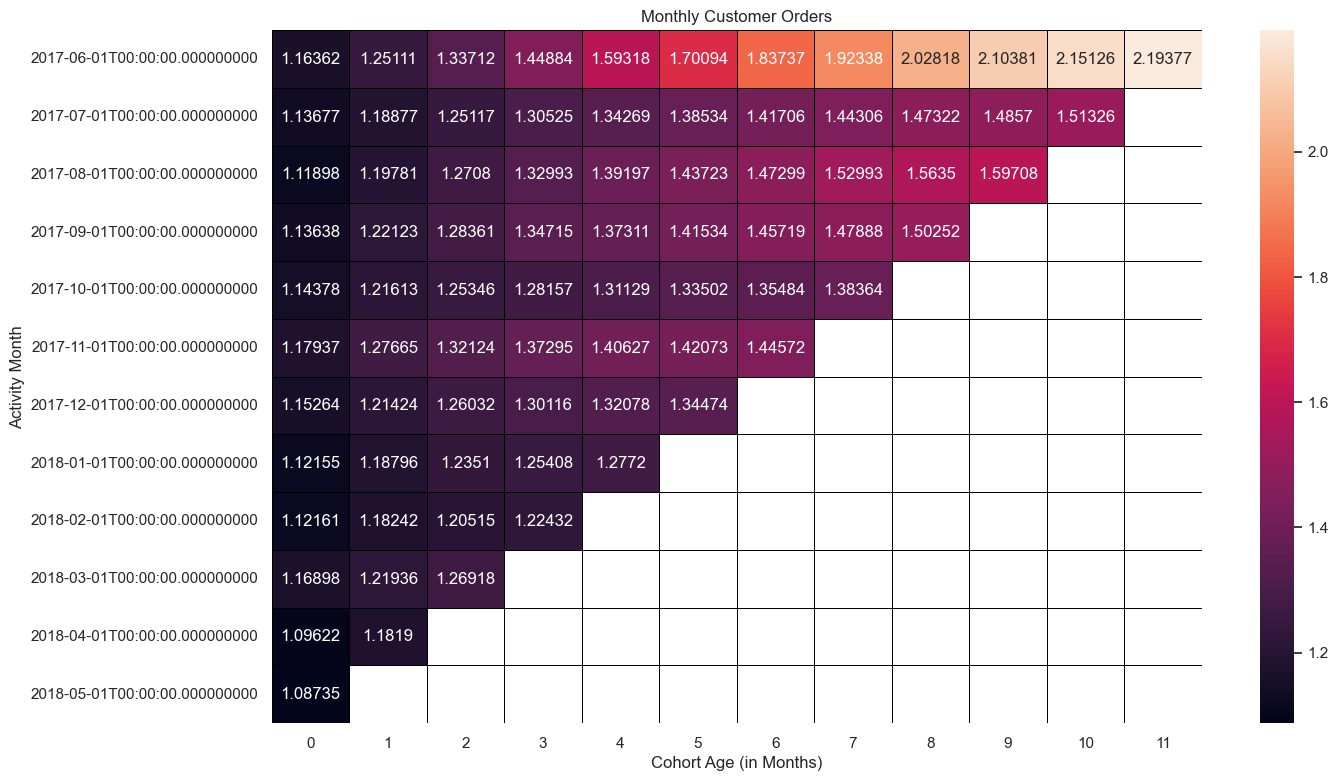

In [57]:
# Plotting the average number of orders
monthly_orders = buyers.pivot_table(index='first_order_month',
                                    columns='cohort_age',
                                    values='avg_monthly_orders',
                                    aggfunc='mean').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(monthly_orders,
            annot=True,
            fmt='g',
            linewidths=0.5,
            linecolor='black')

plt.title('Monthly Customer Orders')
plt.xlabel('Cohort Age (in Months)')
plt.ylabel('Activity Month')
plt.show()

Based on the heatmap it shows that the after each cohort's first order most customers within that cohort come back to order again within 12 months. This is seen especially so in the first cohort as on average every customer came back at least once more within 12 months.

[Back to Table of Contents](#back)

##### Customer long term value

In [58]:
# Calculating the customer long term value
buyers['ltv'] = buyers['revenue'] / buyers['cohort_size']

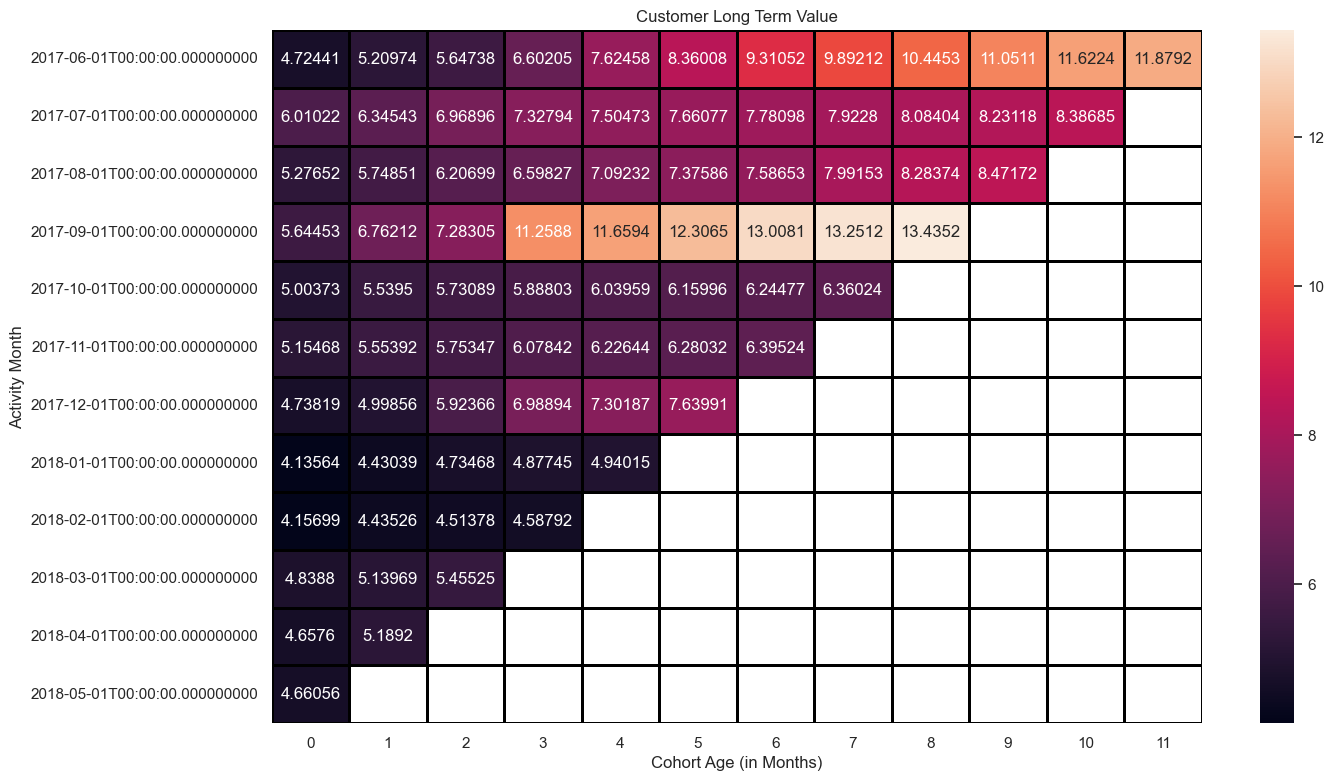

In [59]:
# Plotting the customer long term value
ltv_pivot = buyers.pivot_table(index='first_order_month',
                               columns='cohort_age',
                               values='ltv',
                               aggfunc='sum').cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(ltv_pivot,
            annot=True,
            fmt='g',
            linewidths=1,
            linecolor='black')

plt.title('Customer Long Term Value')
plt.xlabel('Cohort Age (in Months)')
plt.ylabel('Activity Month')
plt.show()

This heatmap reiterates that many cohorts do not reach ltv maturity until the third month. After the third month, the customer's ltv increases quickly.

[Back to Table of Contents](#back)

### Marketing

##### Total marketing cost

In [60]:
# Totaling the costs
print('Total marketing cost:', costs['costs'].sum())

Total marketing cost: 329131.62


The total marketing cost for the 12 month period comes out to $329,132

[Back to Table of Contents](#back)

##### Marketings cost per source

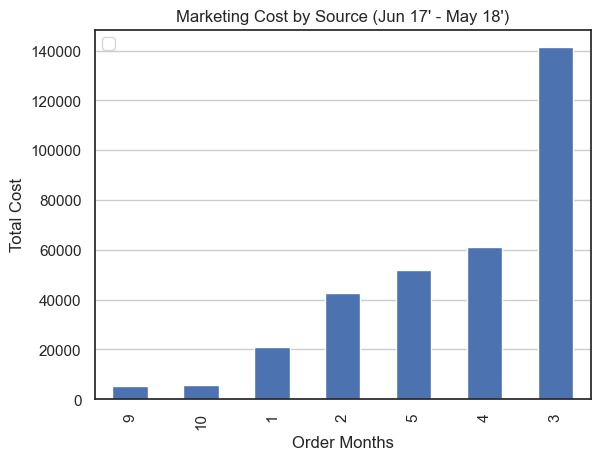

In [61]:
# Plotting the total costs per source
costs.groupby('source_id').agg({'costs':'sum'}).sort_values('costs').plot(kind='bar')

plt.title('Marketing Cost by Source (Jun 17\' - May 18\')')
plt.xlabel('Order Months')
plt.ylabel('Total Cost')

plt.legend('')
plt.grid(axis='y')
plt.show()

According to the cost data, source 3 was the most funded marketing source and source 9 and 10 were the least funded marketing source. It is also worth noting that sources 6-8 were not shown and so those sources should be cut or looked into more on why they were not used.

[Back to Table of Contents](#back)

##### Marketing cost per source over time

In [62]:
# Getting the month value from the dt column
costs['month'] = costs['dt'].values.astype('datetime64[M]')

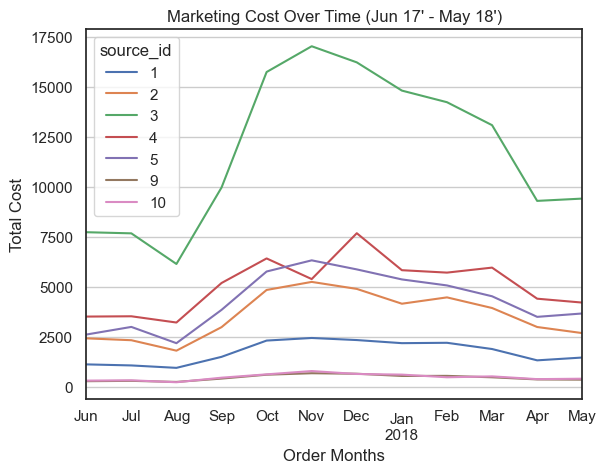

In [63]:
# Plotting the costs over time per source
costs.pivot_table(index='month',
                  columns='source_id',
                  values ='costs',
                  aggfunc='sum').plot()

plt.title('Marketing Cost Over Time (Jun 17\' - May 18\')')
plt.xlabel('Order Months')
plt.ylabel('Total Cost')

plt.grid(axis='y')
plt.show()

Based on the chart, we have spent the most on source 3 than all other sources and spent the least on sources 9 and 10.

[Back to Table of Contents](#back)

#### Customer acquisition cost per source

In [64]:
# Getting the first source of user interactions
sources = visits_log_us.sort_values(by=['uid','start_ts']).groupby('uid').agg({'source_id':'first'}).reset_index()

# Naming the new columns
sources.columns = ['uid','first_source']

# Getting the first customer order date time
buyers_ = orders_log_us.groupby('uid').agg({'buy_ts':'min'}).reset_index()

# Merging the dataframes
buyers_ = buyers_.merge(sources, on='uid')

In [65]:
# Calculating the total costs per month from each source
costs_by_month_source = costs.groupby(['month','source_id'])['costs'].sum().reset_index()

In [66]:
# Getting the month value
buyers_['month'] = buyers_['buy_ts'].values.astype('datetime64[M]')

In [67]:
# Calculating the total number of users from each source
buyers_per_month_source = buyers_.groupby(['month','first_source'])['uid'].nunique().reset_index()

# Renaming the columns
buyers_per_month_source = buyers_per_month_source.rename(columns={'first_source':'source_id'})

# Merging the dataframes
res = costs_by_month_source.merge(buyers_per_month_source, how='left', on=['month','source_id'])

In [68]:
# Calculating the customer acquisition cost
res['cac'] = res['costs'] / res['uid']

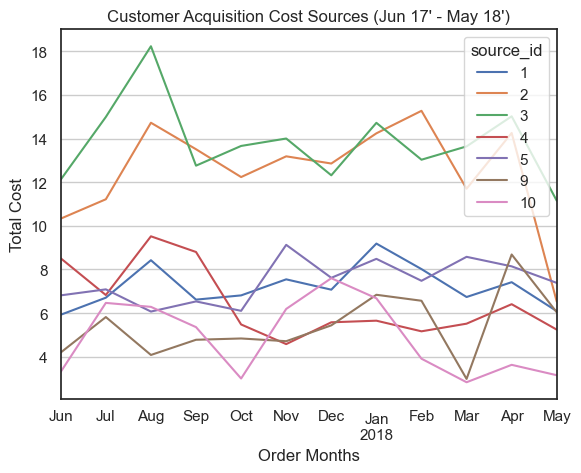

In [69]:
# Plotting the customer acquisition cost
res.pivot_table(index='month',
                columns='source_id',
                values='cac').plot(title='Customer Acquisition Cost Sources (Jun 17\' - May 18\')',
                                    xlabel='Order Months',
                                    ylabel='Total Cost')
plt.grid(axis='y')
plt.show()

Based on the graph it shows the customer acquisition cost graph, it shows that source 2 and 3 are the most expensive sources used to acquire users. However, towards the end of the recorded timeframe, source from source 2 cost to acquire users sharply decreased to the average of the sources 1, 4, 5, and 9. 

[Back to Table of Contents](#back)

#### Return on marketing investment

In [70]:
# Totaling the total monthly costs
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()

# Merging the dataframes
buyers = pd.merge(buyers, monthly_costs, left_on='first_order_month', right_on='month')

In [71]:
# Calculating the cost of acquisition
buyers['cac'] = buyers['costs'] / buyers['cohort_size']

# Calculating the return on marketing investment
buyers['romi'] = buyers['ltv'] / buyers['cac']

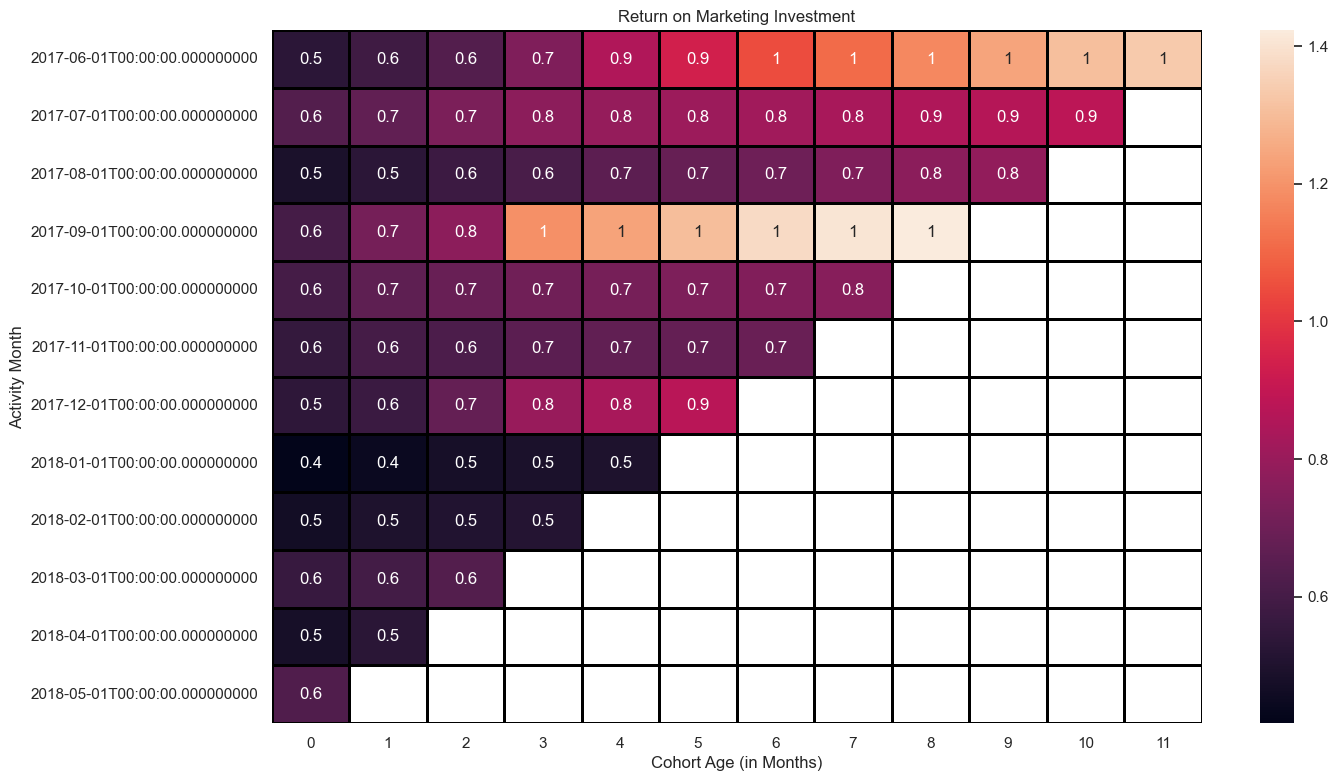

In [72]:
# Plotting the romi
romi_pivot = buyers.pivot_table(index='first_order_month',
                                columns='cohort_age',
                                values='romi',
                                aggfunc='sum').cumsum(axis=1)
 
sns.set(style='white')
plt.figure(figsize=(15, 9))
sns.heatmap(romi_pivot,
            annot=True,
            fmt='.0g',
            linewidths=1,
            linecolor='black')

plt.title('Return on Marketing Investment')
plt.xlabel('Cohort Age (in Months)')
plt.ylabel('Activity Month')
plt.show()

Based on this heatmap and sample size, it shows that most of the 2017 cohorts are expecting to make a positive return going into the summer of 2018. This means it takes about a year for summer cohorts to make a positive romi. It should be noted that the September 17' and June 17' cohorts were unusually very strong cohorts making a positive romi within 12 months. From the current sample size, 2017 the Q3 and Q4 cohorts also saw the highest and quickest returns when compared to the cohorts that started in 2018. This shows that we should allocate most of our marketing budget to acquiring customers during the summer and fall as those customers are shown to spend during the holidays and well into Q1 of the next year. 

[Back to Table of Contents](#back)

## Conclusion

In conclusion, based on the limited sample size, I would recommend allocating more of the marketing budget to the sources that were used to acquire the summer 17' cohorts and the September 17' cohort. These cohorts tend to spend more going into the holiday season and more importantly continue to buy from us after the holiday season despite Q1 normally being the slowest quarter for sales. It should also be noted that many cohorts do not see a positive romi within this timeframe, however, given enough time most of them will eventually reach a positive romi. As we continue as a company LTV customer value will increase over multiple years as well as the ROMI for those cohorts. A customer's LTV only increases over a longer period as the initial acquisition cost is a one-time cost where the customer will keep coming back as long as they like our products/services. In conclusion, the marketing budget should allocate a large portion of the budget to acquire more customers from the summer 17' cohorts since these cohorts tend to have the quickest romi and provide high long-term value when compared to the other cohorts based on the current sample size. 

[Back to Table of Contents](#back)